In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [74]:
df['duration'].min()

4

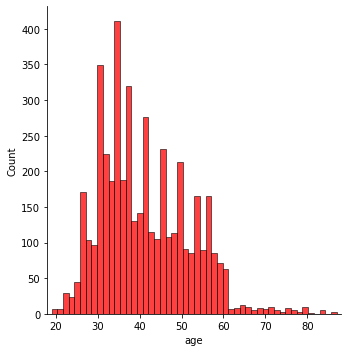

In [82]:
sns.displot(df['age'],kde=False,bins=50,color="red")
plt.xlim(18,88)
plt.savefig('displot.png')

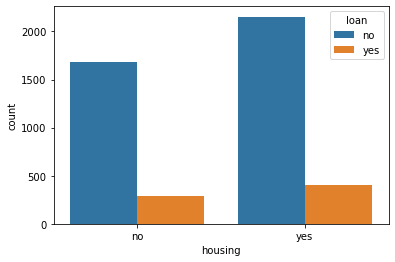

In [79]:
sns.countplot(x='housing',data=df,hue='loan')
plt.savefig('countplot.png')

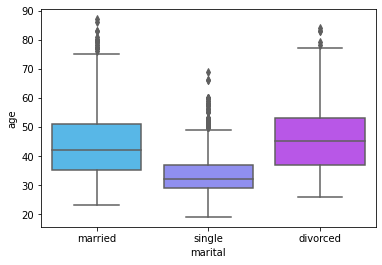

In [83]:
sns.boxplot(x='marital',y='age',data=df,palette='cool')
plt.savefig('boxplot.png')

In [22]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

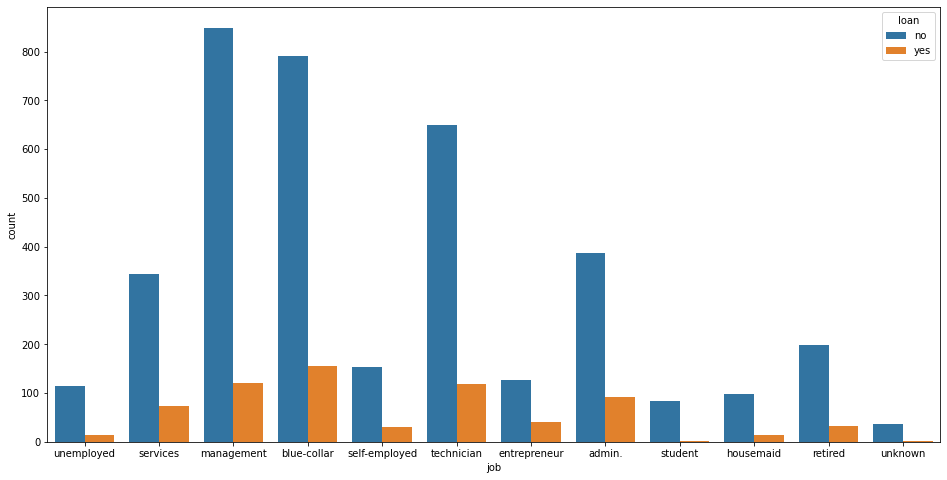

In [81]:
plt.figure(figsize=(16,8))
sns.countplot(x='job',data=df,hue='loan')
plt.savefig('countplot_2.png')

In [68]:
df.groupby(['job','loan']).mean()[['age','balance','duration']].transpose()

job            admin.              blue-collar             entrepreneur  \
loan               no         yes           no         yes           no   
age         39.726098   39.494505    40.343038   39.211538    42.409449   
balance   1312.718346  861.076923  1141.627848  799.211538  1807.141732   
duration   239.377261  214.648352   274.407595  297.173077   284.944882   

job                      housemaid                management               \
loan              yes           no          yes           no          yes   
age         40.780488    47.080808    49.307692    40.451119    41.175000   
balance   1143.268293  2075.888889  2144.076923  1846.382803  1204.791667   
duration   287.121951   300.525253   232.538462   259.738516   266.183333   

job       ...     services                  student           technician  \
loan      ...           no         yes           no     yes           no   
age       ...    38.396501   39.378378    26.879518    22.0    39.505393   
balance   ...  1206.635569  628.027027  1548.433735  1161.0  1428.388290   
duration  ...   257.259475  286.716216   250.253012   119.0   255.144838   

job                    unemployed                  unknown         
loan             yes           no         yes           no    yes  
age        39.277311    40.982609   40.230769    48.054054   50.0  
balance   799.840336  1151.800000  537.615385  1533.081081  341.0  
duration  236.000000   308.843478  234.230769   204.675676  670.0  

[3 rows x 24 columns]

In [69]:
df.groupby(['job','loan']).max()[['age','balance','duration']].transpose()

job      admin.        blue-collar       entrepreneur        housemaid         \
loan         no    yes          no   yes           no    yes        no    yes   
age          66     60          75    58           63     54        80     60   
balance   22171  13229       16353  8545        42045  16874     26965  21244   
duration   1713    908        2456  1258         2769   1484      1558    701   

job      management         ... services       student       technician  \
loan             no    yes  ...       no   yes      no   yes         no   
age              80     60  ...       60    57      42    22         71   
balance       27359  19447  ...    26394  5673   11555  1161      27733   
duration       2087   1689  ...     1971  1532    1124   119       1994   

job             unemployed       unknown       
loan        yes         no   yes      no  yes  
age          58         60    52      71   50  
balance   27069       9019  2400    7337  341  
duration   2029       3025   670     789  670  

[3 rows x 24 columns]